# Análisis exploratorio dataset suicidios 1985-2016

### Autor: Miguel González Cobaleda

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualización
import matplotlib.pyplot as plt #visualización
%matplotlib inline 

## Descripción del dataset

El dataset recoge los datos de suicidios de diferentes países desde el año **1985** hasta el año **2016**, el objetivo del dataset es ver si realmente se ha producido un aumento de suicidios con el paso de los años y de que manera los suicidios están relacionados con el poder adquisitivo o el desarrollo de un país.

In [3]:
suicidios = pd.read_csv("..\datos\master.csv") # Cargamos el dataset

In [4]:
suicidios.head() # Vemos la estructura de los datos, cargando las 5 primeras observaciones

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
suicidios.tail() # Las últimas observaciones del dataset

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [4]:
suicidios.shape # observaciones y variables

(27820, 12)

In [5]:
suicidios.info() # observamos el tipo de dato y el numero de datos no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [12]:
suicidios.isnull().sum() # observamos en las variables que hay NA, en este caso en HDI for year hay 19456 NA

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [24]:
suicidios.duplicated().sum() # no hay observaciones duplicadas

0

## Diccionario de datos

Creamos una tabla con las variables existentes:

| Nombre de la variable | Descripción | Tipo de dato |
| :-- | :-- | :-- |
| country | Nombre del país donde tiene lugar el suicidio | object |
| year | Año en el que tiene lugar el suicidio | int |
| sex | Sexo del fallecido | object |
| age | Intervalo de edad del fallecido | object |
| suicides_no | Número de suicidios | int |
| population | Población | int |
| suicides/100k pop | Tasa de suicidios por 100.000 habitantes | float |
| country-year | País y año | object |
| HDI for year | Índice de desarrollo humano | float |
| gdp_for_year | PIB del país | int |
| gdp_per_capita | PIB per cápita | int |
| generation | Nombre de la generación a la que pertenee el fallecido | object |

## Distribución de los datos

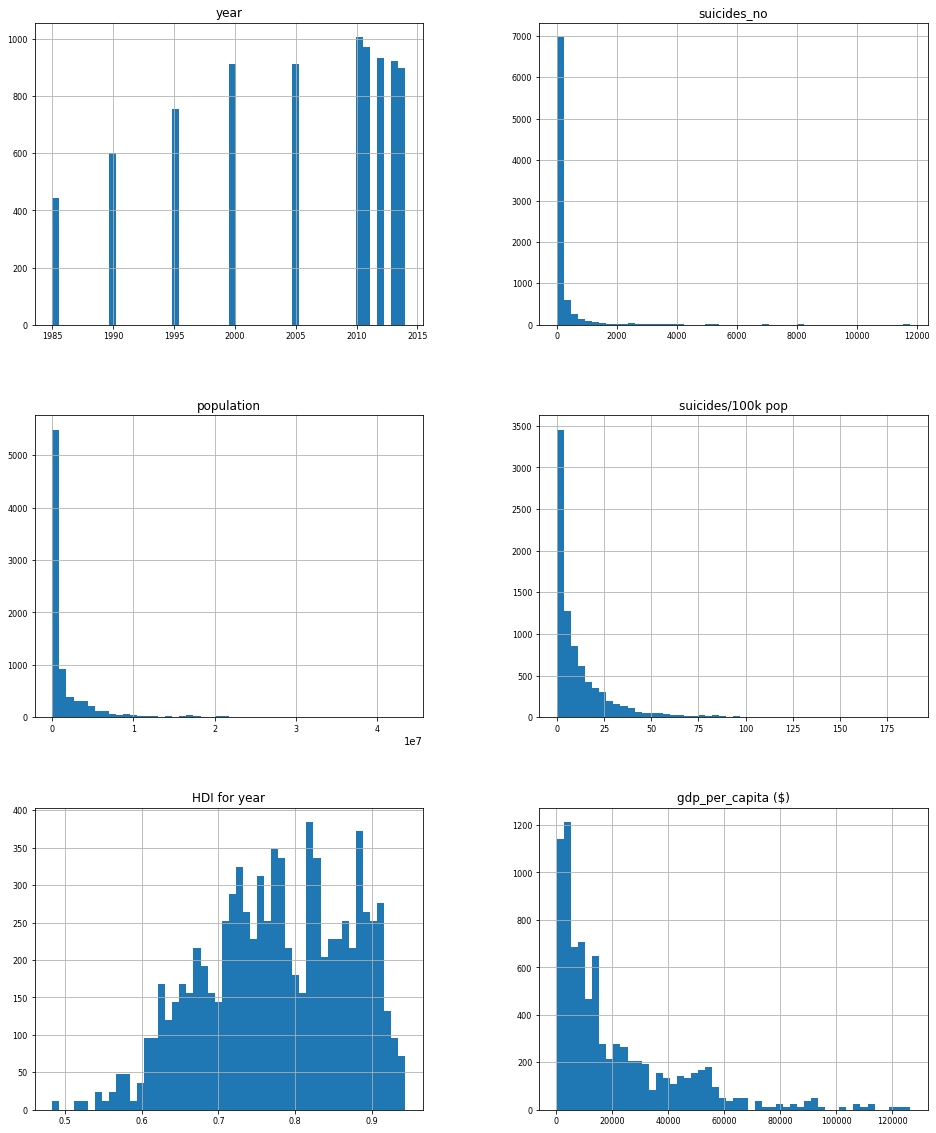

In [60]:
suicidios.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # histobrama para observar la densidad de cada variable

<AxesSubplot:>

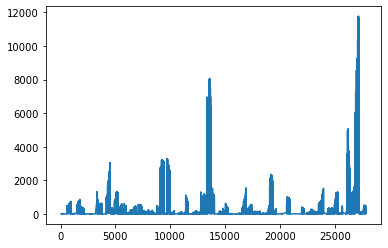

In [38]:
suicidios.suicides_no.plot() # Creamos un grafico en el que podemos observar el aumento del numero de suicidios con el paso del tiempo

## Estadisticos del dataset

In [28]:
suicidios.describe() # Utilizamos la funcion describe para observar los estadisticos de las variables numéricas del dataset

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [64]:
suicidios.corr() # Obtenemos una matriz de correlación para ver que variables están mas correlacionadas

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.024297,-0.012628,-0.077410,0.366786,0.297888
suicides_no,-0.024297,1.000000,0.698758,0.237169,0.151399,0.105182
population,-0.012628,0.698758,1.000000,-0.023197,0.102943,0.073701
suicides/100k pop,-0.077410,0.237169,-0.023197,1.000000,0.074279,-0.002339
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.297888,0.105182,0.073701,-0.002339,0.771228,1.000000


<AxesSubplot:>

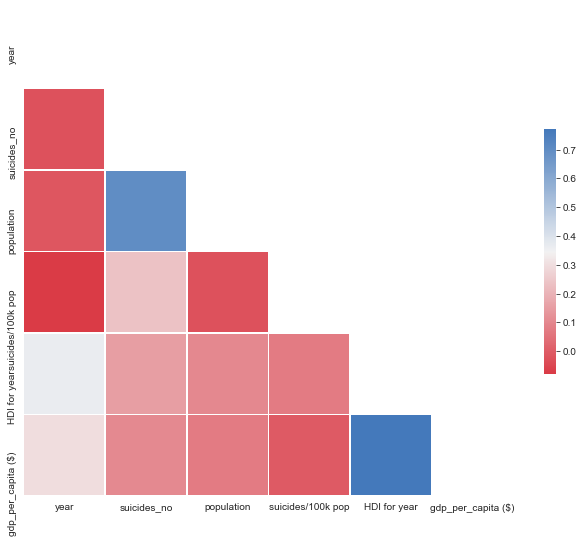

In [74]:
# Creamos un grafico la matriz de correlaciones para observar dichas correlaciones de manera visual, la peculiaridad de este 
# gráfico es que tiene forma de triangulo

corr = suicidios.corr()

# enmascaramos los valores de la esquina superuior derecha
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# color de fondo
sns.set_style(style = 'white')

# tamaño del lienzo
f, ax = plt.subplots(figsize=(11, 9))

# Añadimos el color de las correlacciones
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Dibujamos el grafico de correlacciones
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

<AxesSubplot:>

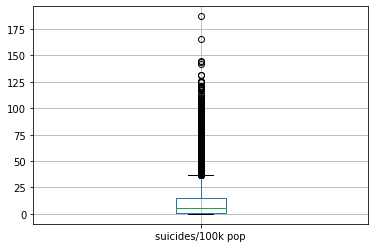

In [59]:
suicidios.boxplot(column=['suicides/100k pop']) # observamos observaciones atícpicas en el numero de suicidios por 100k habitantes
                                                # hay bastantes. Elijo solo esta variable para observar los atipicos debido a que
                                                # creo que es la mas representativa del dataset